# **Laboratorijska vježba 5**: Strojno učenje: Regresija


> Analiza podataka četvrti je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. Ova faza je ključna faza u znanosti o podacima, a uključuje izvođenje različitih tehnika za analizu podataka. U sklopu ovog koraka provodi se eksploratorna/potvrdna, prediktivna, regresijska ili kvalitativna analiza. 

> U ovoj laboratorijskoj vježbi upoznat ćemo se s jednim aspektom analize podataka koji se naziva prediktivna analiza. U sklopu ove analize uobičajeno se primjenjuju algoritmi strojnog učenja. U ovoj laboratorijskoj vježbi proučit ćemo algoritme strojnog učenja za regresiju. U tu svrhu koristit ćemo biblioteku scikit-learn. 
---

# **Strojno učenje**

Strojno učenje bavi se proučavanjem i oblikovanjem računalnih algoritama koji grade modele problema iz različitih domena na temelju empirijskih podataka. Ti se modeli koriste za obavljanje raznih zadataka, kao što su predviđanje, donošenje odluka te raspoznavanje uzoraka. Osnovni pristupi strojnom učenju jesu **nadzirano** i **nenadzirano učenje**. Najčešći tipovi problema u domeni nadziranog učenja jesu **regresijski** i **klasifikacijski** problemi. Kod nadziranog strojnog učenja, skup podataka sadrži oznake primjeraka koje mogu biti diskretne (klasifikacija) ili kontinuirane (regresija). 

## **Primjena algoritma strojnog učenja**

Algoritme strojnog učenja tipično primjenjujemo kroz sljedeće korake:

1.  Prikupljanje i predobrada podataka
2.  Ekstrakcija značajki - na ulaz algoritma strojnog učenja dovode se podaci u obliku skupa primjeraka (ili instanci). Primjerci su u suštini reci u skupu podataka. Svaki je primjerak opisan vektorom značajki koje su ključne karakteristike tog primjerka. U ovom koraku potrebno je osmisliti na koji način prikazati skup značajki te implementirati postupke ekstrakcije značajki.
3.  Redukcija dimenzionalnosti - ovaj korak nije neophodan, ali može pomoći ukloniti redundantne, nevažne i štetne značajke. Uklanjanje takvih značajki u pravilu doprinosi performansama algoritma strojnog učenja.
4.  Odabir modela (engl. *model selection*) - ovo je važan korak u kojem se odabire prikladan algoritam strojnog učenja s "optimalnim" postavkama parametara za dani problem.
5.  Treniranje modela - algoritam strojnog učenja trenira se nad skupom podataka, odnosno uči način preslikavanja ulaznih u izlazne podatke. Može trajati od nekoliko sekundi do nekoliko tjedana.
6.  Vrednovanje modela - ovisno o tipu problema koji promatramo (regresija, klasifikacija, grupiranje,...), postoje razne mjere za vrednovanje performansi treniranog modela.
7.  Dijagnostika i ispravljanje - ako model ne radi na zadovoljavajućoj razini, potrebno ga je doraditi i poboljšati mu performanse.  
8.  Instalacija - model se u konačnici može ugraditi u produkciju gdje će odrađivati predviđeni posao.

## **Osnovna terminologija**

Na ulazu algoritma strojnog učenja nalazi se **primjerak** (engl. *instance*). Primjerak jest jedna podatkovna točka, odnosno jedan redak u skupu podataka. Svaki primjerak predstavljen je vektorom značajki. Značajka (engl. *feature*) jest (bitna) karakteristika primjerka, a ponekad se naziva i atributom. Formalno ovaj odnos možemo zapisati kao:

$$ \textbf{x} = (x_{1}, x_{2},\dots,x_{d}) , $$

gdje su $x_i$ pojedine značajke, a $d$ broj značajki, odnosno dimenzionalnost problema. Primjerci se nalaze u prostoru primjeraka, odnosno ulaznom prostoru $\mathcal{X}$ koji je $d$-dimenzionalan.

Kod nadziranog strojnog učenja, svaki primjerak ima svoju oznaku (engl. *label*). Ona predstavlja oznaku klase (kod klasifikacije) ili ciljnu brojčanu vrijednost (kod regresije). Oznaku primjerka označit ćemo s $y$, a skup svih mogućih oznaka s $\mathcal{Y}$. Za regresiju tipičan slučaj jest da vrijedi $\mathcal{Y}=\mathbb{R}$. 

Konačno, skup svih označenih primjeraka označit ćemo s $\mathcal{D}$:

$$ \mathcal{D} = \{(\textbf{x}^{(i)}, y^{(i)})\}_{i=1}^{N} \subset \mathcal{X} \times \mathcal{Y} . $$ 

Skup $\mathcal{D}$ može se prikazati matricama:

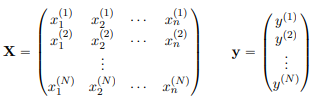


### **Hipoteza**

Svrha nadziranog strojnog učenja jest naučiti funkciju koja primjercima iz $\mathcal{X}$ dodjeljuje oznake iz $\mathcal{Y}$. Drugim riječima, svrha je naučiti preslikavanje iz $\mathcal{X}$ u $\mathcal{Y}$. Ta funkcija se naziva hipoteza:

$$ h: \mathcal{X} → \mathcal{Y} . $$

Općenito, mi ne znamo unaprijed koja ja točna funkcija $h$. Kad bismo to znali, ne bi nam trebalo strojno učenje. Međutim, moramo otprilike reći koji su kandidati za hipotezu. To radimo odabirom algoritma strojnog učenja i postavljanjem njegovih hiperparametara. Ovaj korak se kratko naziva korakom treniranja modela.

### **Treniranje modela**

Model predstavlja skup hipoteza koje su parametrizirane s vektorom parametara $\Theta$, odnosno:

$$ \mathcal{H} = \{h(\textbf{x};\Theta)\}_{Θ} . $$

To znači da svaki vektor $\Theta$ odgovara jednoj funkciji iz skupa $\mathcal{H}$. Prema tome, model jest skup funkcija parametriziranih s $\Theta$. **Treniranje (ili učenje)** modela nije ništa drugo nego **pretraživanje** skupa hipoteza $\mathcal{H}$ u nastojanju da se nađe najbolja hipoteza $h \in \mathcal{H}$. **Da bismo mogli naći najbolju hipotezu, moramo znati kako vrednovati kvalitetu hipoteze**. U tu svrhu, razvijene su brojne mjere za vrednovanje performansi algoritma strojnog učenja. One su specifične za svaki tip problema strojnog učenja. Nadalje, budući da je treniranje modela zapravo pretraživanje skupa hipoteza, može se promatrati kao **optimizacijski problem**. Stoga su za svaki algoritam strojnog učenja razvijene razne optimizacijske tehike za njegovo treniranje.  

## **Tri osnovne komponente algoritma strojnog učenja**

Prema navedenom, možemo uočiti da je svaki algoritam strojnog učenja moguće opisati u smislu njegove tri glavne komponente:

1.  Model - skup hipoteza parametriziranih vektorom parametara $\Theta$.
2.  Funkcija gubitka (engl. *loss function*) - mjera performansi koja govori koliko je kvalitetna hipoteza. Ona predstavlja kriterij po kojem se vodi treniranje modela.
3.  Optimizacijski postupak - postupak kojim unutar modela nalazimo hipotezu koja minimizira funkciju gubitka za sve primjerke u skupu podataka. Pojednostavljeno rečeno, ovaj postupak predstavlja način treniranja modela. 



## **Odabir modela**

U idealnom slučaju, u odabranom modelu (skupu hipoteza) postoji hipoteza za koju je zbroj svih pogrešaka (funkcija gubitka) za sve primjerke u skupu podataka jednaka 0. No, lako je moguće da takva hipoteza ne postoji. Tada kažemo da model nije dovoljne **složenosti** za promatrani problem. Intuitivno se nameće rješenje - zašto odmah ne odabrati složeniji model? 

Međutim, u stvarnim podacima uvijek postoji šum (engl. *noise*), odnosno neželjena anomalija u podacima zbog koje dolazi do odstupanja opaženih vrijednosti od pravih vrijednosti. Mogući razlozi šuma u podacima jesu nepreciznost pri mjerenju, pogreške u označavanju, postojanje skrivenih značajki koje nismo uključili, nejasna granica između klasa i sl. Ako šum postoji, jednostavan model ne može pronaći hipotezu koja ima grešku 0. S druge strane, ako je model previše složen, on će se previše prilagoditi podacima te će se naučiti i šum. Za takav model kažemo da će **loše generalizirati**. No, generalizacija je ključno svojstvo modela strojnog učenja - želimo da radi dobro na primjercima koje nije vidio tijekom treninga. 

Situaciju kad za neki problem koristimo prejednostavan model zovemo **podnaučenost**. Obratno, situaciju u kojoj koristimo presložen model nazivamo **prenaučenost**. Općenito, idealan model bio bi onaj koji nije niti prejednostavan niti presložen. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.1, 0.2, 0.25, 0.3, 0.45, 0.45, 0.5, 0.5, 0.55, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95])
y = np.array([0.1, 0.5, 0.3, 0.45, 0.6, 0.7, 0.88, 0.8, 1, 0.88, 0.65, 0.44, 0.62, 0.99, 0.4])

#plt.scatter(x,y)

poly1 = np.poly1d(np.polyfit(x, y, 1))(x)
poly3 = np.poly1d(np.polyfit(x, y, 3))(x)
poly8 = np.poly1d(np.polyfit(x, y, 8))(x)

fig, axes = plt.subplots(1,3)

axes[0].scatter(x,y)
axes[1].scatter(x,y)
axes[2].scatter(x,y)
axes[0].plot(x, poly1, c='b', label='polinom prvog stupnja')
axes[1].plot(x, np.array(poly3), c='g', label='polinom treceg stupnja')
axes[2].plot(x, np.array(poly8), c='r', label='polinom osmog stupnja')

Odabir modela čija složenost odgovara pravoj složenosti problema koji nastojimo naučiti izvodi se tijekom koraka **odabira modela**. 

Dakle, potrebno je odabrati optimalan model $\mathcal{H}$ unutar neke familije modela:

$$ \{\mathcal{H}_1, \mathcal{H}_2, \dots, \mathcal{H}_k\} . $$

Primjerice, kod regresije možemo birati stupanj polinoma: počevši od pravca preko parabole pa sve do neke visoko nelinearne krivulje. Složenost modela predstavljena je **hiperparametrima modela**. Odgovornost postavljanja hiperparametara modela obično je na podatkovnom analitičaru. Obično se provodi treniranjem više različitih modela (tj. odabirom raznih vrijednosti hiperparametara) te usporedbom njihovih performansi. Pri tome, ključno je prethodno napraviti podjelu skupa podataka kako bi se uspoređivale sposobnosti generalizacije ovih modela. 

### **Podjela skupa podataka**

Kako bi se procijenila sposobnost generalizacije algoritma strojnog učenja, izvedba treniranog modela obično se testira na skupu za testiranje (engl. *test set*) koji čine primjerci iz skupa podataka izdvojeni prethodno treniranju modela. Najčešći postupci raspodjele skupa podataka za potrebe testiranja jesu postupak izdvajanja (engl. *holdout*) te postupak unakrsne provjere $k$ preklopa (engl. *k-fold cross-validation*). 


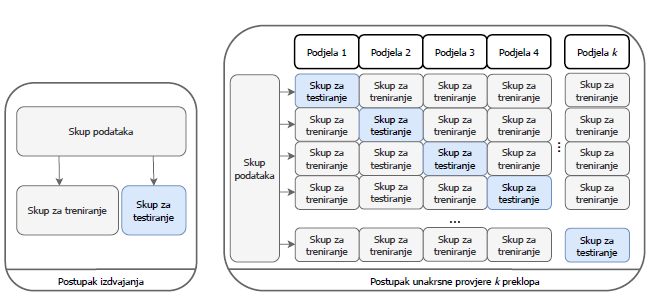

Postupak izdvajanja dijeli skup podataka na dva disjunktna podskupa, odnosno na skup za treniranje te na skup za testiranje. Postupak unakrsne provjere $k$ preklopa koristi se kad je veličina skupa za treniranje, dobivenog postupkom izdvajanja, nedostatna za treniranje učinkovitih modela. Stoga se skup podataka često dijeli na $k$ disjunktnih podskupova (preklopa), pri čemu se svaki od njih samo jednom koristi za testiranje, a $k-1$ puta za treniranje modela. Konačna kvaliteta modela izražava se kao aritmetička sredina njegovih vrednovanih izvedbi na svakom od $k$ preklopa korištenih za testiranje.  

# **Regresija**

U kontekstu strojnog učenja, regresija znači predviđanje numeričkih vrijednosti. 

## **Linearna regresija**

Najpoznatiji algoritam strojnog učenja koji se koristi za potrebe regresije jest linearna regresija. Poznat je i oblik modela linearne regresije:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_dx_d . $$

Kod regresije, vektor parametara modela umjesto sa $\Theta$ tipično označavamo sa $\beta$. Za jednodimenzijski ulazni prostor ($d=1$), model će biti jednostavna linearna regresija koja se može vizualizirati pravcem. Za $d=2$, model opisuje ravninu u prostoru, a za $d>2$ hiperravninu. Uz model, osnovne komponente nekog algoritma strojnog učenja jesu funkcija gubitka te način optimizacije. Funkcija gubitka kod linearne regresije jest kvadratno odstupanje (kvadrat reziduala): 

$$ L(y, h(x)) = (y - h(x))^2 . $$

Stoga, cilj je pronaći hipotezu koja minimizira sumu kvadratnih odstupanja, odnosno: 

$$ \sum_{i=1}^N (y^{(i)} - h(x^{(i)}))^2, $$ 

uz malu preinaku radi kasnije matematičke jednostavnosti: 

$$ \frac{1}{2}\sum_{i=1}^N (y^{(i)} - h(x^{(i)}))^2 . $$

Možemo ovdje napomenuti da se prosječna suma kvadratnih odstupanja (odnosno prosječna vrijednost kvadrata reziduala) još naziva i **srednjom kvadratnom greškom** (engl. *mean squared error, MSE*), a dobije se dijeljenjem sume kvadratnih odstupanja s brojem primjeraka u skupu podataka. Mjera MSE je korisna za usporedbu performansi različitih modela regresije. 

Treća komponenta algoritma regresije jest optimizacijski postupak koji traži hipotezu, odnosno parametre $\beta$ koji minimiziraju pogrešku:

$$(\beta_0,\dots,\beta_1)^*  = \text{argmin} \frac{1}{2}\sum_{i=1}^N (y^{(i)} - h(x^{(i)}))^2 . $$

Kao što smo to objasnili u prethodnoj vježbi, optimalni koeficijenti $\beta$ dobiju se rješavanjem $N$ linearnih jednadžbi s $d+1$ nepoznanica. Ovaj postupak naziva se **metodom najmanjih kvadrata** (engl. *ordinary least squares, OLS*). Rješenje ove jednadžbe je vektor 

$$ \hat{\beta} = (\beta_0,\dots,\beta_1)^* = (X^TX)^{-1} X^TY . $$



Pretpostavimo, primjerice, da je pred nama problem predviđanja cijena nekretnina u gradu Osijeku. Za svaku nekretninu imamo niz značajki $\textbf{x}$ koje ju opisuju te njezinu cijenu $y$ u EUR. Promotrimo za početak skup podataka koji sadrži samo jednu značajku $x_{1}$ koja predstavlja površinu nekretnine ($m^2$). 

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Area (m^2)': [100, 50, 22, 442, 54, 100, 87, 35, 87, 34, 570, 366, 34, 76, 156], 
                   'Price (€)': [150, 100, 40, 1000, 120, 220, 160, 88, 125, 60, 2200, 999, 80, 150, 300]})

df = df.sort_values('Area (m^2)')

sns.lmplot(x='Area (m^2)', y='Price (€)', data=df)

Pomoću biblioteke scikit-learn, možemo izvesti korake odabira, treniranja i vrednovanja modela. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

feature_cols = df.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sorted_inds = np.argsort(X_train['Area (m^2)'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['Area (m^2)'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

# Predviđene trening vrijednosti:
y_train_predicted = model.predict(X_train)
diff = np.abs(y_train - y_train_predicted)
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_train, y_train_predicted, c='r')
plt.plot(X_train, diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

In [ ]:
# Predviđene testne vrijednosti:
y_test_predicted = model.predict(X_test)

diff = np.abs(y_test - y_test_predicted)
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_test, y_test_predicted, c='r')
plt.plot(X_test, diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

## **Nelinearna regresija**

Često je u praksi veza izmedu nezavisnih varijabli i zavisne varijable nelinearna. U prethodnom primjeru promatrali smo vezu između cijene nekretnine i površine, za koju "znamo" da je u pravilu linearna (proporcionalna). No, kad bi u skup podataka uvrstili neku drugu značajku (primjerice udaljenost od centra), za vezu između nje i izlazne varijable potencijalno ne bi vrijedilo da je linearna. Da bismo modelirali nelinearne ovisnosti, treba nam **nelinearan model**. Od linearnog modela regresije, nelinearan model možemo dobiti primjenom raznih transformacija nad značajkama ili izlaznom varijablom. O ovim transformacijama smo pričali i u prethodnoj laboratorijskoj vježbi (prisjetimo se logaritamske transformacije te interakcijskih članova). Tako za promatrani model predviđanja cijena nekretnina možemo napraviti nelinaran model:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 , $$

gdje je $x_1$ površina nekretnine. Ovdje smo nelinearnost uveli ubacivanjem kvadrata nad značajkom $x_1$, no moguće je primijeniti i bilo koju drugu matematičku funkciju nad značajkom. Moguće je primijetiti da je ovaj model složeniji od prethodnog modela jer sadrži i nelinearne hipoteze, a uključuje i sve hipoteze koje je uključivao i raniji model (ako je $\beta_2=0$). Primijetimo također da ta povećana složenost dolazi s cijenom: model ima jedan više parametar od prethodnog modela što povećava njegovu složenost. Povećanjem složenosti povećavamo opasnost od toga da je naš model presložen, odnosno prenaučen. Takav model može imati slabu sposobnost generalizacije nad neviđenim podacima. No, lako je usporediti je li došlo do prenaučenosti ako usporedimo performanse složenijeg i jednostavnijeg modela na skupu podataka za testiranje.



In [ ]:
df['Area_squared'] = df['Area (m^2)'] * df['Area (m^2)']
df = df[['Area (m^2)', 'Area_squared', 'Price (€)']]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

feature_cols = df.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sorted_inds = np.argsort(X_train['Area (m^2)'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['Area (m^2)'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]


model = LinearRegression().fit(X_train, y_train)

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

# Predviđene trening vrijednosti:
y_train_predicted = model.predict(X_train)

diff = np.abs(y_train - y_train_predicted)
plt.scatter(X_train.iloc[:,:-1], y_train, c='g')
plt.scatter(X_train.iloc[:,:-1], y_train_predicted, c='r')
plt.plot(X_train.iloc[:,:-1], diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted))

In [ ]:
# Predviđene testne vrijednosti:
y_test_predicted = model.predict(X_test)

diff = np.abs(y_test - y_test_predicted)
plt.scatter(X_test.iloc[:,:-1], y_test, c='g')
plt.scatter(X_test.iloc[:,:-1], y_test_predicted, c='r')
plt.plot(X_test.iloc[:,:-1], diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

Korištenje polinoma drugog stupnja samo je jedan način, no ne i jedini, kako dobiti nelinearan model. Veću nelinearnost možemo ostvariti povećanjem stupnja polinoma. Također, dodavanje interakcijskih članova čini model nelinearnim. Nadalje, nelinearnost se može ostvariti i drugim funkcijama koje nisu polinomi. 

### **Preslikavanje u prostor značajki**

Premda kažemo da su gornji modeli nelinearni, u njima je izlazna varijabla i dalje predstavljena kao linearna kombinacija značajki. Nelinearnost tog modela zapravo se očituje u nelinearnosti značajki, odnosno nad značajkama se provode razne nelinearne transformacije. Stoga, takvi modeli se i dalje mogu definirati pomoću modela linearne regresije, odnosno pomoću LinearRegression klase iz biblioteke scikit-learn. Samo se prethodno definiranju modela nad značajkama provedu nelinearne transformacije. 

Ako u skupu podataka već imamo značajke koje po svojoj prirodi nisu linearne (primjerice, vrijednosti slijede eksponencijalnu distribuciju), nad njima također možemo provesti odgovarajuću transformaciju koja će ih pokušati dovesti u linearni oblik. Ovaj postupak preslikavanja zove se **preslikavanje u prostor značajki** (engl. *feature mapping*). Prikladnim preslikavanjem iz ulaznog prostora u prostor značajki možemo ostvariti da primjeri, koji u ulaznom prostoru nisu bili linearno odvojivi, to budu u prostoru značajki. Stoga, umjesto da u ulaznom prostoru pokušavamo naći nelinearnu hipotezu, mi ćemo primjerke nelinarnim preslikavanjem dovesti u prostor značajki veće dimenzije i tamo ih onda odvojiti linearnom hipotezom. 

Promotrimo ponovno problem predviđanja cijena nekretnina na temelju površine.

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats import diagnostic

df = pd.DataFrame({'Area (m^2)': [100, 50, 22, 442, 54, 100, 87, 35, 87, 34, 570, 366, 34, 76, 156], 
                   'Price (€)': [150, 100, 40, 1000, 120, 220, 160, 88, 125, 60, 2200, 999, 80, 150, 300]})

df = df.sort_values('Area (m^2)')

sns.lmplot(x='Area (m^2)', y='Price (€)', data=df)

In [ ]:
plt.hist(df['Area (m^2)'])
print(diagnostic.kstest_normal(df['Area (m^2)'], dist='exp'))
print(diagnostic.kstest_normal(df['Area (m^2)'], dist='norm'))

In [ ]:
df['Area (m^2)'] = pow(df['Area (m^2)'],2)
sns.lmplot(x='Area (m^2)', y='Price (€)', data=df)

In [ ]:
plt.hist(df['Area (m^2)'])
print(diagnostic.kstest_normal(df['Area (m^2)'], dist='exp'))
print(diagnostic.kstest_normal(df['Area (m^2)'], dist='norm'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

feature_cols = df.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sorted_inds = np.argsort(X_train['Area (m^2)'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['Area (m^2)'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

# Predviđene trening vrijednosti:
y_train_predicted = model.predict(X_train)

diff = np.abs(y_train - y_train_predicted)
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_train, y_train_predicted, c='r')

plt.plot(X_train, diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted))


In [ ]:
# Predviđene testne vrijednosti:
y_test_predicted = model.predict(X_test)

diff = np.abs(y_test - y_test_predicted)
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_test, y_test_predicted, c='r')

plt.plot(X_test, diff, label='|y-h(x)|')
plt.xlabel('Area (m^2)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

## **Regularizacija** ##

Kao što smo vidjeli, kod linearnog modela regresije možemo ostvariti različite složenosti modela odabirom odgovarajućih transformacija nad značajkama te uvođenjem novih značajki (povećanjem stupnja polinoma, uvođenjem interakcijskih članova i sl.). Ovisno o tome kakvu transformaciju odaberemo, model će biti više ili manje složen. Prethodno smo ustvrdili kako je jedan od glavnih ciljeva u strojnom učenju odabrati model primjerene složenosti za promatrani problem (ni prejednostavan, ni presložen). Uvođenjem novih značajki i provođenjem transformacija nad postojećim značajkama idemo u tom smjeru, no također povećavamo i opasnost od prenaučenosti modela. Prenaučenost modela može se pokušati spriječiti na razne načine koji su primarno usmjereni na obrađivanje skupa podataka (prikupljanje dodatnih podataka, odabir i transformacija značajjki i sl.). S druge strane, postoje i načini sprječavanja prenaučenosti modela koji su usmjereni na izmjenu samog modela. Najpoznatiji takav postupak u kontekstu regresije jest **regularizacija**.

Regularizacija jest postupak kojim se sprječava odabir presloženih modela pri samom treniranju. Iako je ova ideja univerzalna u strojnom učenju, mi ćemo ju promotriti u kontekstu regresije. Za početak, možemo primijetiti kako složenost modela regresije izravno ovisi o težinama značajki (odnosno koeficijentima $\beta$) te da će prenaučeni model imati visoke vrijednosti za mnoge značajke (pogotovo one koje uvode nelinearnost). S druge strane, što su težine uz nelinearne značajke bliže nuli, to je model manje složen. Kako bismo izbjegli visoke težine uz nelinearne značajke već pri samom treniranju modela, uvođenjem regularizacije u model možemo "kazniti" hipoteze s velikim težinama značajki. U praksi, to izgleda tako da treniramo model koji ima relativno visoku složenost, ali koristimo regularizaciju kako bismo mu efektivno smanjili složenost. Cilj regularizacije jest što više težina pritegnuti na nulu, kako bi se spriječila prenaučenost. 

Regularizacija se ostvaruje relativno jednostavno: u funkciju pogreške koju minimiziramo dodajemo član koji karakterizira složenost modela u ovisnosti o njegovim težinama. Tako dobijemo regulariziranu funkciju pogreške:

$$ E(\beta) + \lambda Ω (\beta) . $$ 

U ovom izrazu, $\lambda$ je tzv. **regularizacijski faktor**. Ako je $\lambda=0$, onda se vraćamo na neregulariziranu funkciju pogreške. Veća $\lambda$ više će kažnjavati složenost modela i imat će za efektivnu posljedicu smanjenje složenosti modela. Uz određivanje $\lambda$, potrebno je odrediti $\Omega (\beta)$ funkciju.

### **L2-regularizacija (hrbatna regresija)**
Kao funkcija $\Omega (\beta)$ najčešće se uzima norma vektora. Dakle, ova funkcija može se definirati kao:

$$ \Omega (\beta) = ||\beta||_p = (\sum_{j=1}^m |\beta_j|^p)^{\frac{1}{p}} . $$

U strojnom učenju, najčešće koristimo norme sa $p=0$, $p=1$ i $p=2$. L2-regularizacija daje tzv. hrbatnu regresiju (engl. *ridge regression*):

$$ E(\beta) = \frac{1}{2} \sum_{i=1}^N (\beta^T h(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}||\beta||_2^2. $$

L2-regularizacija kažnjava hipotezu onoliko koliko njezine težine odstupaju od nule u smislu kvadratnog odstupanja (što znači da će veće težine biti kažnjene više, a manje težine će biti kažnjene manje).

### **L1-regularizacija**

Umjesto L2-regularizacije, možemo napraviti L1-regularizaciju ili LASSO regularizaciju (engl. *least absolute shrinkage and selection operator*):

$$ E(\beta) = \frac{1}{2} \sum_{i=1}^N (\beta^T h(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2} ||\beta||_1. $$

L1-regularizacija kažnjava hipotezu onoliko koliko njezine težine odstupaju od nule po apsolutnoj vrijednosti. L1-regularizacija nema kvadrat, pa će te malene težine kažnjavati više od L2-regularizacije. S druge strane, L2-regularizacija će male težine kažnjavati vrlo malo, i zapravo će ih vrlo teško dotjerati skroz do nule. Zbog toga će L1-regularizacija općenito rezultirati modelima kod kojih je više težina pritegnuto baš na nulu, tj. rezultirati će  rjeđim modelima nego L2-regularizacija. L1 i L2-regularizacije moguće je pozvati iz biblioteke scikit-learn pomoću Ridge i Lasso klasa iz modula linear_model. Optimalni tip regularizacije, kao i vrijednost parametra $\lambda$, u pravilu se odabire u **koraku odabira modela**.


## **Mjere za vrednovanje modela regresije** ##

Vrednovanje modela važan je korak u strojnom učenju, a izvodi se tijekom treniranja i odabira modela. Već smo spomenuli mjeru MSE koja se izvodi iz funkcije gubitka algoritma linearne regresije, a ukazuje na srednje kvadratno odstupanje stvarnih i predviđenih vrijednosti. Uz ovu mjeru, još česte mjere za vrednovanje modela regresije jesu mjere RMSE (engl. *root mean square error*) i MAE (engl. *mean absolute error*). Mjera RMSE računa se kao 

$$ RMSE = \sqrt{MSE} . $$

Često se koristi umjesto MSE, kada je vrijednost MSE prevelika da bi se direktno usporili različiti algoritmi. Drugim riječima, RMSE je jednostavnije interpretirati od MSE. 

Mjera MAE jest slična mjeri MSE, uz razliku da se promatraju apsolutna odstupanja između stvarnih i predviđenih vrijednosti, a ne kvadratna.

$$ MAE = \frac{1}{N} \sum_{i=1}^N |y^{(i)} - h (x^{(i)})| . $$

U usporedbi s MSE ili RMSE, MAE jest direktnija reprezentacija sume odstupanja (reziduala). MSE više kažnjava veća odstupanja zbog kvadriranja, dok MAE sva odstupanja tretira jednako. 



# **Literatura**


---

[1] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[2] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[3] Materijali za predmet Strojno učenje na FER (https://strojnoucenje.takelab.fer.hr/)